In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df = pd.read_csv('student_data (1).csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Student_ID       100 non-null    int64  
 1   Name             100 non-null    object 
 2   Age              100 non-null    int64  
 3   Gender           100 non-null    object 
 4   Math_Grade       95 non-null     float64
 5   Science_Grade    100 non-null    float64
 6   English_Grade    100 non-null    float64
 7   Attendance (%)   97 non-null     float64
 8   Extracurricular  100 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 7.2+ KB


In [10]:
df.shape

(100, 9)

In [11]:
df.ndim

2

In [7]:
summary = (df.describe()).round(1)

In [8]:
summary

,Student_ID,Age,Math_Grade,Science_Grade,English_Grade,Attendance (%)
count,100.0,100.0,95.0,100.0,100.0,97.0
mean,50.5,15.6,74.9,71.2,72.6,90.3
std,29.0,1.1,9.6,11.4,10.3,5.1
min,1.0,14.0,48.8,45.7,36.3,79.4
25%,25.8,15.0,69.5,61.4,65.5,86.3
50%,50.5,16.0,74.7,72.7,72.5,90.4
75%,75.2,17.0,81.0,77.9,79.7,93.6
max,100.0,17.0,99.6,100.0,95.5,100.0


In [9]:
correlation = (summary.corr()).round(3)

In [10]:
correlation

,Student_ID,Age,Math_Grade,Science_Grade,English_Grade,Attendance (%)
Student_ID,1.000,0.573,0.747,0.812,0.820,0.470
Age,0.573,1.000,0.505,0.580,0.577,0.379
Math_Grade,0.747,0.505,1.000,0.991,0.987,0.931
Science_Grade,0.812,0.580,0.991,1.000,0.990,0.889
English_Grade,0.820,0.577,0.987,0.990,1.000,0.872
Attendance (%),0.470,0.379,0.931,0.889,0.872,1.000


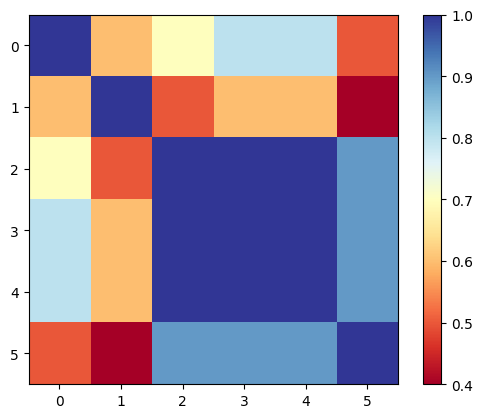

In [25]:
plt.imshow(correlation, cmap ="RdYlBu")
plt.colorbar()
plt.show()

In [31]:
df.isnull().sum()

Student_ID         0
Name               0
Age                0
Gender             0
Math_Grade         5
Science_Grade      0
English_Grade      0
Attendance (%)     3
Extracurricular    0
dtype: int64

In [39]:
mean = df['Math_Grade'].mean()

In [48]:
df['Math_Grade'] = df['Math_Grade'].fillna(mean)

In [44]:
mean_attendence = df['Attendance (%)'].mean()

In [49]:
df['Attendance (%)'] = df['Attendance (%)'].fillna(mean_attendence)

In [50]:
df.isnull().sum()

Student_ID         0
Name               0
Age                0
Gender             0
Math_Grade         0
Science_Grade      0
English_Grade      0
Attendance (%)     0
Extracurricular    0
dtype: int64

In [58]:
group_gender = df.groupby('Gender')['Gender'].count()

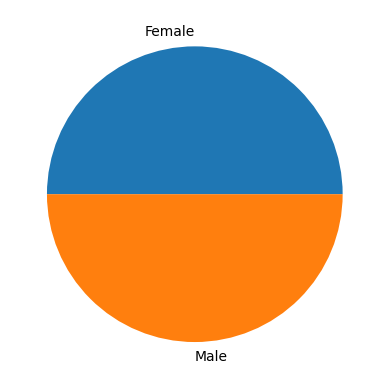

In [65]:
plt.pie(group_gender, labels=group_gender.index)
plt.show()

In [73]:
df = df.replace([' ', ''], np.nan)

In [74]:
df = df.dropna(how='any')

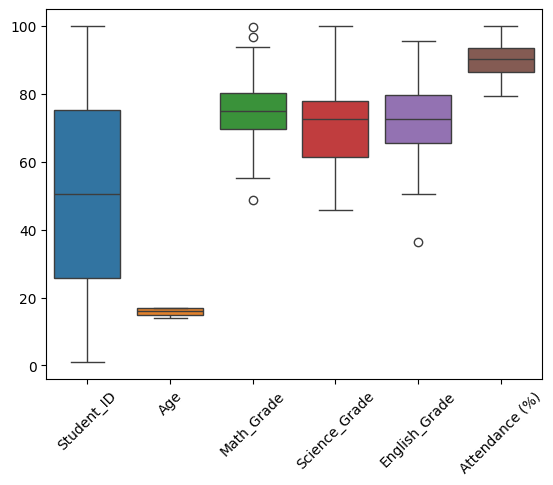

In [86]:
sns.boxplot(df)
plt.xticks(rotation=45)
plt.show()

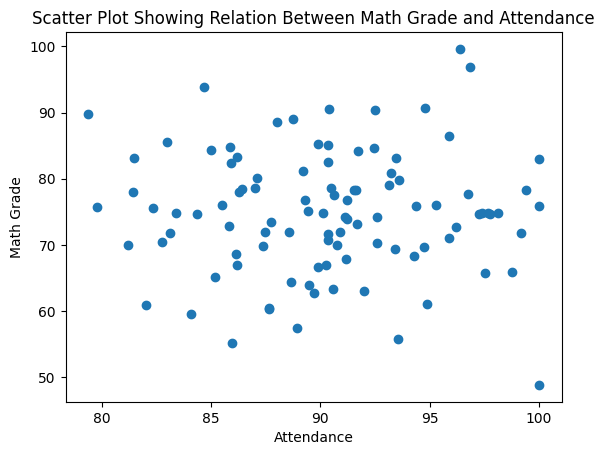

In [94]:
plt.scatter(df['Attendance (%)'], df['Math_Grade'])
plt.xlabel('Attendance')
plt.ylabel('Math Grade')
plt.title('Scatter Plot Showing Relation Between Math Grade and Attendance')
plt.show()

In [98]:
correlation_math_attendance = df['Attendance (%)'].corr(df['Math_Grade'])

In [99]:
correlation_math_attendance

np.float64(-0.007729987865728339)

In [101]:
correlation_english_attendance = df['Attendance (%)'].corr(df['English_Grade'])

In [102]:
correlation_english_attendance

np.float64(0.03598620943072738)

In [103]:
correlation_science_attendance = df['Attendance (%)'].corr(df['Science_Grade'])

In [104]:
correlation_science_attendance

np.float64(-0.03141171288473793)

# Average Grade Per Gender

In [12]:
df['Total_Grades'] = df['Math_Grade'] + df['Science_Grade'] + df['English_Grade']

In [16]:
df = df.round(1)

In [19]:
grade_per_gender = df.groupby('Gender')['Total_Grades'].mean().reset_index()

In [21]:
grade_per_gender.round(1)

,Gender,Total_Grades
0,Female,216.7
1,Male,220.8


# Correlation Between Attendance and Grades

In [23]:
corr_attendance_grades = df['Attendance (%)'].corr(df['Total_Grades'])

In [24]:
corr_attendance_grades

np.float64(0.008574046516983782)

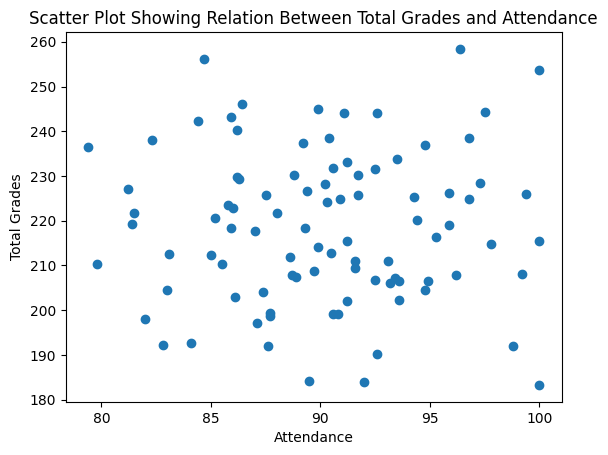

In [25]:
plt.scatter(df['Attendance (%)'], df['Total_Grades'])
plt.xlabel('Attendance')
plt.ylabel('Total Grades')
plt.title('Scatter Plot Showing Relation Between Total Grades and Attendance')
plt.show()

# Impact of Extracurricular activities on Grades

In [30]:
extcurr_by_grades = df.groupby('Extracurricular')['Total_Grades'].mean().reset_index()

In [32]:
extcurr_by_grades.round(1)

,Extracurricular,Total_Grades
0,No,217.2
1,Yes,219.8


In [34]:
df['extracurricular_num'] = df['Extracurricular'].map({'Yes': 1, 'No': 0})

correlation = df['extracurricular_num'].corr(df['Total_Grades'])

In [35]:
correlation

np.float64(0.07673453910608753)

# Histogram Showing scores

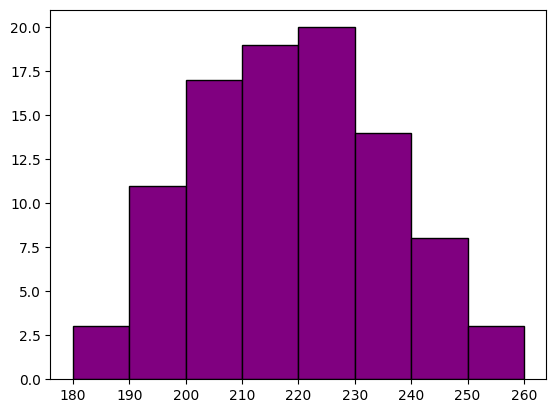

In [42]:
bins = [180, 190, 200, 210, 220, 230,240, 250, 260]
plt.hist(df['Total_Grades'], bins=bins, color='purple', edgecolor='black')
plt.show()

In [38]:
df['Total_Grades'].min()

np.float64(183.3)

In [39]:
df['Total_Grades'].max()

np.float64(258.4)